In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report


In [2]:
data = pd.read_excel('MealAnalysis.xlsx')

In [3]:
data

,Unnamed: 0,Type,gender,age,height,weight,EER[kcal],P target(15%)[g],F target(25%)[g],C target(60%)[g],number of dishes,E[kcal],P[g],F[g],C[g],Salt[g],Vegetables[g],Score(1:worst 2:bad 3:good 4:best)
0,1.0,breakfast,female,32.0,157.0,48.0,1655.0,62.043750,45.958333,248.175000,2.0,333.87,5.85,0.75,75.69,0.21,29.0,2.0
1,2.0,breakfast,female,35.0,161.0,55.0,2073.0,77.745091,57.588956,310.980364,2.0,213.85,4.62,4.48,41.25,0.11,0.0,1.0
2,3.0,breakfast,female,26.0,159.0,51.0,2042.0,76.584375,56.729167,306.337500,4.0,351.59,27.31,18.85,18.10,2.84,116.4,2.0
3,4.0,breakfast,female,48.0,164.0,57.0,1772.0,66.431250,49.208333,265.725000,2.0,295.43,5.63,0.89,65.08,0.65,189.0,2.0
4,5.0,dinner,female,48.0,164.0,57.0,1772.0,66.431250,49.208333,265.725000,5.0,876.19,41.46,34.16,96.30,6.37,53.5,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1310,1311.0,lunch,male,39.0,170.0,60.0,1685.0,63.168750,46.791667,252.675000,2.0,690.60,19.05,33.96,71.89,1.60,60.0,1.0
1311,1312.0,breakfast,male,39.0,173.0,58.0,2105.0,78.918750,58.458333,315.675000,2.0,292.66,6.02,10.76,42.38,0.97,0.0,1.0
1312,1313.0,breakfast,male,39.0,170.0,60.0,1685.0,63.168750,46.791667,252.675000,1.0,158.40,5.58,2.64,28.02,0.78,0.0,1.0
1313,1314.0,dinner,male,39.0,173.0,58.0,2105.0,78.918750,58.458333,315.675000,1.0,363.82,15.20,12.68,44.18,1.35,22.0,2.0


# Prepare the dataset

## Duplicate Data

In [4]:
data.duplicated().sum()

0

## Missing Data

In [5]:
data.isnull().sum().sort_values(ascending=False)

gender                                1
age                                   1
height                                1
weight                                1
Type                                  1
Unnamed: 0                            0
P[g]                                  0
Vegetables[g]                         0
Salt[g]                               0
C[g]                                  0
F[g]                                  0
C target(60%)[g]                      0
E[kcal]                               0
number of dishes                      0
F target(25%)[g]                      0
P target(15%)[g]                      0
EER[kcal]                             0
Score(1:worst 2:bad 3:good 4:best)    0
dtype: int64

In [6]:
data.isnull().sum().sort_values(ascending=False)/len(data)

gender                                0.00076
age                                   0.00076
height                                0.00076
weight                                0.00076
Type                                  0.00076
Unnamed: 0                            0.00000
P[g]                                  0.00000
Vegetables[g]                         0.00000
Salt[g]                               0.00000
C[g]                                  0.00000
F[g]                                  0.00000
C target(60%)[g]                      0.00000
E[kcal]                               0.00000
number of dishes                      0.00000
F target(25%)[g]                      0.00000
P target(15%)[g]                      0.00000
EER[kcal]                             0.00000
Score(1:worst 2:bad 3:good 4:best)    0.00000
dtype: float64

Since the missing data is very little compare to the whole dataset, I choose to drop it instead of replacing it with certain value

In [7]:
data = data.dropna(subset=['gender','age','height','weight','Type'])

In [8]:
data = data.drop('Unnamed: 0',axis=1)

In [9]:
data.isnull().sum().sort_values(ascending=False)/len(data)

Type                                  0.0
number of dishes                      0.0
Vegetables[g]                         0.0
Salt[g]                               0.0
C[g]                                  0.0
F[g]                                  0.0
P[g]                                  0.0
E[kcal]                               0.0
C target(60%)[g]                      0.0
gender                                0.0
F target(25%)[g]                      0.0
P target(15%)[g]                      0.0
EER[kcal]                             0.0
weight                                0.0
height                                0.0
age                                   0.0
Score(1:worst 2:bad 3:good 4:best)    0.0
dtype: float64

In [10]:
data.describe()

,age,height,weight,EER[kcal],P target(15%)[g],F target(25%)[g],C target(60%)[g],number of dishes,E[kcal],P[g],F[g],C[g],Salt[g],Vegetables[g],Score(1:worst 2:bad 3:good 4:best)
count,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000
mean,39.703196,166.562405,58.714612,2176.561644,81.615568,60.455977,326.462273,2.707002,595.265244,21.312998,23.561180,69.507664,3.003158,72.618995,1.964992
std,9.369062,6.498895,8.368238,313.459450,11.754709,8.707192,47.018838,1.613961,309.043933,12.802065,18.166417,36.228099,1.995755,80.746709,0.712413
min,22.000000,152.000000,45.000000,1545.000000,57.949864,42.925825,231.799455,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,35.000000,160.000000,51.250000,2020.000000,75.731250,56.097222,302.925000,1.000000,371.717500,12.280000,9.942500,42.360000,1.490000,0.000000,2.000000
50%,39.000000,167.000000,58.000000,2105.000000,78.918750,58.458333,315.675000,2.000000,564.515000,20.170000,19.485000,67.770000,2.720000,47.000000,2.000000
75%,44.000000,173.000000,63.000000,2376.000000,89.114456,66.010708,356.457825,4.000000,780.620000,28.137500,33.087500,92.722500,4.205000,120.600000,2.000000
max,62.000000,179.000000,91.000000,3380.000000,126.750000,93.888889,507.000000,13.000000,2382.340000,94.010000,141.660000,239.760000,14.740000,621.500000,4.000000


In [11]:
data.Type.unique()

array(['breakfast', 'dinner', 'lunch'], dtype=object)

In [12]:
data.gender.unique()

array(['female', 'male'], dtype=object)

# Scaling numerical features


<AxesSubplot:ylabel='Frequency'>

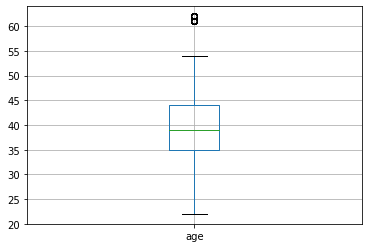

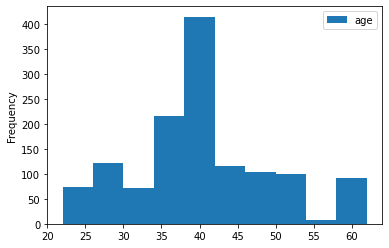

In [13]:
data[['age']].boxplot()
data[['age']].plot.hist(bins=10)

Age have normal distributions and outliers. Use Robust Scaled.

<AxesSubplot:ylabel='Frequency'>

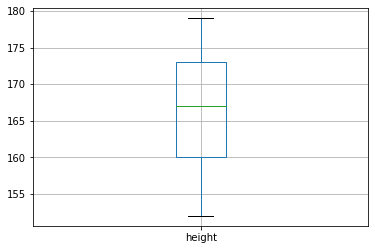

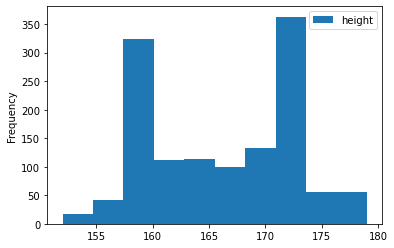

In [14]:
data[['height']].boxplot()
data[['height']].plot.hist(bins=10)

<AxesSubplot:ylabel='Frequency'>

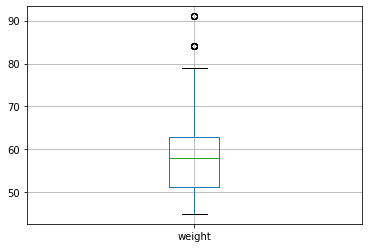

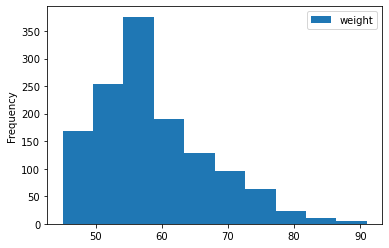

In [15]:
data[['weight']].boxplot()
data[['weight']].plot.hist(bins=10)

In [16]:
from sklearn.preprocessing import RobustScaler

## age and weight has outlier so i use to use Robustscaler

rb_scaler = RobustScaler() 

data['age'],data['weight'] = rb_scaler.fit_transform(data[['age','weight']]).T

data.head()

,Type,gender,age,height,weight,EER[kcal],P target(15%)[g],F target(25%)[g],C target(60%)[g],number of dishes,E[kcal],P[g],F[g],C[g],Salt[g],Vegetables[g],Score(1:worst 2:bad 3:good 4:best)
0,breakfast,female,-0.777778,157.0,-0.851064,1655.0,62.043750,45.958333,248.175000,2.0,333.87,5.85,0.75,75.69,0.21,29.0,2.0
1,breakfast,female,-0.444444,161.0,-0.255319,2073.0,77.745091,57.588956,310.980364,2.0,213.85,4.62,4.48,41.25,0.11,0.0,1.0
2,breakfast,female,-1.444444,159.0,-0.595745,2042.0,76.584375,56.729167,306.337500,4.0,351.59,27.31,18.85,18.10,2.84,116.4,2.0
3,breakfast,female,1.000000,164.0,-0.085106,1772.0,66.431250,49.208333,265.725000,2.0,295.43,5.63,0.89,65.08,0.65,189.0,2.0
4,dinner,female,1.000000,164.0,-0.085106,1772.0,66.431250,49.208333,265.725000,5.0,876.19,41.46,34.16,96.30,6.37,53.5,2.0


In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data['height'],data['number of dishes'] = scaler.fit_transform(data[['height','number of dishes']]).T
data.head()

,Type,gender,age,height,weight,EER[kcal],P target(15%)[g],F target(25%)[g],C target(60%)[g],number of dishes,E[kcal],P[g],F[g],C[g],Salt[g],Vegetables[g],Score(1:worst 2:bad 3:good 4:best)
0,breakfast,female,-0.777778,-1.471950,-0.851064,1655.0,62.043750,45.958333,248.175000,-0.438220,333.87,5.85,0.75,75.69,0.21,29.0,2.0
1,breakfast,female,-0.444444,-0.856226,-0.255319,2073.0,77.745091,57.588956,310.980364,-0.438220,213.85,4.62,4.48,41.25,0.11,0.0,1.0
2,breakfast,female,-1.444444,-1.164088,-0.595745,2042.0,76.584375,56.729167,306.337500,0.801439,351.59,27.31,18.85,18.10,2.84,116.4,2.0
3,breakfast,female,1.000000,-0.394433,-0.085106,1772.0,66.431250,49.208333,265.725000,-0.438220,295.43,5.63,0.89,65.08,0.65,189.0,2.0
4,dinner,female,1.000000,-0.394433,-0.085106,1772.0,66.431250,49.208333,265.725000,1.421268,876.19,41.46,34.16,96.30,6.37,53.5,2.0


<AxesSubplot:ylabel='Frequency'>

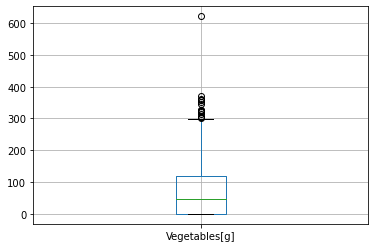

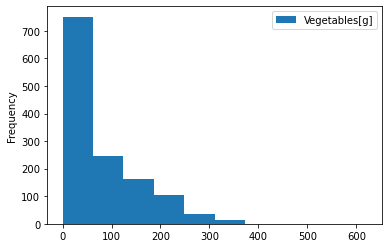

In [18]:
data[['Vegetables[g]']].boxplot()
data[['Vegetables[g]']].plot.hist(bins=10)

In [19]:


data['Vegetables[g]'] = data['Vegetables[g]']/350

In [20]:
data.head()

,Type,gender,age,height,weight,EER[kcal],P target(15%)[g],F target(25%)[g],C target(60%)[g],number of dishes,E[kcal],P[g],F[g],C[g],Salt[g],Vegetables[g],Score(1:worst 2:bad 3:good 4:best)
0,breakfast,female,-0.777778,-1.471950,-0.851064,1655.0,62.043750,45.958333,248.175000,-0.438220,333.87,5.85,0.75,75.69,0.21,0.082857,2.0
1,breakfast,female,-0.444444,-0.856226,-0.255319,2073.0,77.745091,57.588956,310.980364,-0.438220,213.85,4.62,4.48,41.25,0.11,0.000000,1.0
2,breakfast,female,-1.444444,-1.164088,-0.595745,2042.0,76.584375,56.729167,306.337500,0.801439,351.59,27.31,18.85,18.10,2.84,0.332571,2.0
3,breakfast,female,1.000000,-0.394433,-0.085106,1772.0,66.431250,49.208333,265.725000,-0.438220,295.43,5.63,0.89,65.08,0.65,0.540000,2.0
4,dinner,female,1.000000,-0.394433,-0.085106,1772.0,66.431250,49.208333,265.725000,1.421268,876.19,41.46,34.16,96.30,6.37,0.152857,2.0


In [21]:
data.head()

,Type,gender,age,height,weight,EER[kcal],P target(15%)[g],F target(25%)[g],C target(60%)[g],number of dishes,E[kcal],P[g],F[g],C[g],Salt[g],Vegetables[g],Score(1:worst 2:bad 3:good 4:best)
0,breakfast,female,-0.777778,-1.471950,-0.851064,1655.0,62.043750,45.958333,248.175000,-0.438220,333.87,5.85,0.75,75.69,0.21,0.082857,2.0
1,breakfast,female,-0.444444,-0.856226,-0.255319,2073.0,77.745091,57.588956,310.980364,-0.438220,213.85,4.62,4.48,41.25,0.11,0.000000,1.0
2,breakfast,female,-1.444444,-1.164088,-0.595745,2042.0,76.584375,56.729167,306.337500,0.801439,351.59,27.31,18.85,18.10,2.84,0.332571,2.0
3,breakfast,female,1.000000,-0.394433,-0.085106,1772.0,66.431250,49.208333,265.725000,-0.438220,295.43,5.63,0.89,65.08,0.65,0.540000,2.0
4,dinner,female,1.000000,-0.394433,-0.085106,1772.0,66.431250,49.208333,265.725000,1.421268,876.19,41.46,34.16,96.30,6.37,0.152857,2.0


# Dataset balancing


In [22]:
data['Score(1:worst 2:bad 3:good 4:best)'].value_counts()

2.0    757
1.0    320
3.0    200
4.0     37
Name: Score(1:worst 2:bad 3:good 4:best), dtype: int64

Try using SMOTE to balance data in the end. The result doesn't improve much

# Encoding

In [23]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

data['Type'].unique()  # Check unique values 



array(['breakfast', 'dinner', 'lunch'], dtype=object)

In [24]:
ohe = OneHotEncoder(sparse = False) # Instantiate encoder

ohe.fit(data[['Type']]) # Fit encoder

Type_encoded = ohe.transform(data[['Type']]) 

data["breakfast"],data["lunch"],data['dinner'] = Type_encoded.T 

data.head()

,Type,gender,age,height,weight,EER[kcal],P target(15%)[g],F target(25%)[g],C target(60%)[g],number of dishes,E[kcal],P[g],F[g],C[g],Salt[g],Vegetables[g],Score(1:worst 2:bad 3:good 4:best),breakfast,lunch,dinner
0,breakfast,female,-0.777778,-1.471950,-0.851064,1655.0,62.043750,45.958333,248.175000,-0.438220,333.87,5.85,0.75,75.69,0.21,0.082857,2.0,1.0,0.0,0.0
1,breakfast,female,-0.444444,-0.856226,-0.255319,2073.0,77.745091,57.588956,310.980364,-0.438220,213.85,4.62,4.48,41.25,0.11,0.000000,1.0,1.0,0.0,0.0
2,breakfast,female,-1.444444,-1.164088,-0.595745,2042.0,76.584375,56.729167,306.337500,0.801439,351.59,27.31,18.85,18.10,2.84,0.332571,2.0,1.0,0.0,0.0
3,breakfast,female,1.000000,-0.394433,-0.085106,1772.0,66.431250,49.208333,265.725000,-0.438220,295.43,5.63,0.89,65.08,0.65,0.540000,2.0,1.0,0.0,0.0
4,dinner,female,1.000000,-0.394433,-0.085106,1772.0,66.431250,49.208333,265.725000,1.421268,876.19,41.46,34.16,96.30,6.37,0.152857,2.0,0.0,1.0,0.0


In [25]:
data['gender']=pd.get_dummies(data['gender'])['female']

In [26]:
data.head()

,Type,gender,age,height,weight,EER[kcal],P target(15%)[g],F target(25%)[g],C target(60%)[g],number of dishes,E[kcal],P[g],F[g],C[g],Salt[g],Vegetables[g],Score(1:worst 2:bad 3:good 4:best),breakfast,lunch,dinner
0,breakfast,1,-0.777778,-1.471950,-0.851064,1655.0,62.043750,45.958333,248.175000,-0.438220,333.87,5.85,0.75,75.69,0.21,0.082857,2.0,1.0,0.0,0.0
1,breakfast,1,-0.444444,-0.856226,-0.255319,2073.0,77.745091,57.588956,310.980364,-0.438220,213.85,4.62,4.48,41.25,0.11,0.000000,1.0,1.0,0.0,0.0
2,breakfast,1,-1.444444,-1.164088,-0.595745,2042.0,76.584375,56.729167,306.337500,0.801439,351.59,27.31,18.85,18.10,2.84,0.332571,2.0,1.0,0.0,0.0
3,breakfast,1,1.000000,-0.394433,-0.085106,1772.0,66.431250,49.208333,265.725000,-0.438220,295.43,5.63,0.89,65.08,0.65,0.540000,2.0,1.0,0.0,0.0
4,dinner,1,1.000000,-0.394433,-0.085106,1772.0,66.431250,49.208333,265.725000,1.421268,876.19,41.46,34.16,96.30,6.37,0.152857,2.0,0.0,1.0,0.0


# Feature engineering

In [27]:
data["salt"] = np.where(data["gender"] == 1, data['Salt[g]']/7,data['Salt[g]']/8 )
    
## if female, salt devided by 7 which is the daily suggestion amount of salt
## if male, devided by 8

In [28]:
data.head()

,Type,gender,age,height,weight,EER[kcal],P target(15%)[g],F target(25%)[g],C target(60%)[g],number of dishes,...,P[g],F[g],C[g],Salt[g],Vegetables[g],Score(1:worst 2:bad 3:good 4:best),breakfast,lunch,dinner,salt
0,breakfast,1,-0.777778,-1.471950,-0.851064,1655.0,62.043750,45.958333,248.175000,-0.438220,...,5.85,0.75,75.69,0.21,0.082857,2.0,1.0,0.0,0.0,0.030000
1,breakfast,1,-0.444444,-0.856226,-0.255319,2073.0,77.745091,57.588956,310.980364,-0.438220,...,4.62,4.48,41.25,0.11,0.000000,1.0,1.0,0.0,0.0,0.015714
2,breakfast,1,-1.444444,-1.164088,-0.595745,2042.0,76.584375,56.729167,306.337500,0.801439,...,27.31,18.85,18.10,2.84,0.332571,2.0,1.0,0.0,0.0,0.405714
3,breakfast,1,1.000000,-0.394433,-0.085106,1772.0,66.431250,49.208333,265.725000,-0.438220,...,5.63,0.89,65.08,0.65,0.540000,2.0,1.0,0.0,0.0,0.092857
4,dinner,1,1.000000,-0.394433,-0.085106,1772.0,66.431250,49.208333,265.725000,1.421268,...,41.46,34.16,96.30,6.37,0.152857,2.0,0.0,1.0,0.0,0.910000


## calculate new features

In [29]:
data['E ratio'] = data['E[kcal]']/data['EER[kcal]']
data['P ratio'] = data['P[g]']/data['P target(15%)[g]']
data['F ratio'] = data['F[g]']/data['F target(25%)[g]']
data['C ratio'] = data['C[g]']/data['C target(60%)[g]']

In [30]:
X = data.drop(columns=['EER[kcal]','P target(15%)[g]','F target(25%)[g]','C target(60%)[g]','Type','Score(1:worst 2:bad 3:good 4:best)'])
y = data['Score(1:worst 2:bad 3:good 4:best)']

In [31]:
X.head()

,gender,age,height,weight,number of dishes,E[kcal],P[g],F[g],C[g],Salt[g],Vegetables[g],breakfast,lunch,dinner,salt,E ratio,P ratio,F ratio,C ratio
0,1,-0.777778,-1.471950,-0.851064,-0.438220,333.87,5.85,0.75,75.69,0.21,0.082857,1.0,0.0,0.0,0.030000,0.201734,0.094288,0.016319,0.304986
1,1,-0.444444,-0.856226,-0.255319,-0.438220,213.85,4.62,4.48,41.25,0.11,0.000000,1.0,0.0,0.0,0.015714,0.103160,0.059425,0.077793,0.132645
2,1,-1.444444,-1.164088,-0.595745,0.801439,351.59,27.31,18.85,18.10,2.84,0.332571,1.0,0.0,0.0,0.405714,0.172179,0.356600,0.332281,0.059085
3,1,1.000000,-0.394433,-0.085106,-0.438220,295.43,5.63,0.89,65.08,0.65,0.540000,1.0,0.0,0.0,0.092857,0.166721,0.084749,0.018086,0.244915
4,1,1.000000,-0.394433,-0.085106,1.421268,876.19,41.46,34.16,96.30,6.37,0.152857,0.0,1.0,0.0,0.910000,0.494464,0.624104,0.694191,0.362405


## Delete features

In [32]:
X.corrwith(y)

gender              0.142023
age                 0.036097
height             -0.081284
weight             -0.015985
number of dishes    0.372606
E[kcal]             0.381802
P[g]                0.371194
F[g]                0.224695
C[g]                0.438909
Salt[g]             0.422329
Vegetables[g]       0.540537
breakfast          -0.296880
lunch               0.184207
dinner              0.123361
salt                0.443348
E ratio             0.387743
P ratio             0.377356
F ratio             0.227804
C ratio             0.441417
dtype: float64

In [33]:
X= X.drop(columns=['E[kcal]','P[g]','F[g]','C[g]','Salt[g]'])

In [34]:
X.head()

,gender,age,height,weight,number of dishes,Vegetables[g],breakfast,lunch,dinner,salt,E ratio,P ratio,F ratio,C ratio
0,1,-0.777778,-1.471950,-0.851064,-0.438220,0.082857,1.0,0.0,0.0,0.030000,0.201734,0.094288,0.016319,0.304986
1,1,-0.444444,-0.856226,-0.255319,-0.438220,0.000000,1.0,0.0,0.0,0.015714,0.103160,0.059425,0.077793,0.132645
2,1,-1.444444,-1.164088,-0.595745,0.801439,0.332571,1.0,0.0,0.0,0.405714,0.172179,0.356600,0.332281,0.059085
3,1,1.000000,-0.394433,-0.085106,-0.438220,0.540000,1.0,0.0,0.0,0.092857,0.166721,0.084749,0.018086,0.244915
4,1,1.000000,-0.394433,-0.085106,1.421268,0.152857,0.0,1.0,0.0,0.910000,0.494464,0.624104,0.694191,0.362405


# Test train split

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
X_train.count()

gender              1051
age                 1051
height              1051
weight              1051
number of dishes    1051
Vegetables[g]       1051
breakfast           1051
lunch               1051
dinner              1051
salt                1051
E ratio             1051
P ratio             1051
F ratio             1051
C ratio             1051
dtype: int64

# Baseline Model

In [38]:
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Evaluate model without feature permutation
model = LogisticRegression()
cv_results = cross_validate(model, X_train, y_train, cv = 5)
score = cv_results["test_score"].mean()
print(f"Before any feature permutation, the cross-validated accuracy is equal to {round(score,2)}")




Before any feature permutation, the cross-validated accuracy is equal to 0.72


In [39]:

model = LogisticRegression().fit(X,y) # Fit the model 
permutation_score = permutation_importance(model, X_train, y_train, n_repeats=100) 
importance_df = pd.DataFrame(np.vstack((X.columns,
                                        permutation_score.importances_mean)).T, 
                            columns = ['feature','feature_importance']) 

print("After feature permutation, here are the decreases in terms of scores:")
importance_df = importance_df.sort_values(by="feature_importance", ascending = False) # Order by importance
importance_df


After feature permutation, here are the decreases in terms of scores:


,feature,feature_importance
4,number of dishes,0.087926
9,salt,0.078725
5,Vegetables[g],0.052055
3,weight,0.03039
13,C ratio,0.024263
11,P ratio,0.014872
12,F ratio,0.013007
0,gender,0.010913
6,breakfast,0.006746
8,dinner,0.004129


In [40]:
score = model.score(X_test, y_test)
score

0.6844106463878327

# SVM


In [80]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svm=SVC() 
svm.fit(X_train,y_train)
svm_cv_results = cross_validate(svm, X_train, y_train, cv=5,scoring=['precision_macro', 'recall_macro','accuracy'])
svm_cv_results
print('Model test score with cross validation: {0:0.4f}'. format(svm_cv_results['test_accuracy'].mean()))
y_pred=classifier.predict(X_test)
kappa = cohen_kappa_score(y_test, y_pred)
print('Cohens kappa: %f' % kappa)



Model test score with cross validation: 0.7117
Cohens kappa: 0.401541


# Random forest

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [89]:
Rfmodel = RandomForestClassifier()
Rfmodel.fit(X_train,y_train)
Rf_cv_results = cross_validate(Rfmodel, X_train, y_train, cv=5)
print('Model test score with cross validation: {0:0.4f}'. format(Rf_cv_results['test_score'].mean()))
y_pred=Rfmodel.predict(X_test)
kappa = cohen_kappa_score(y_test, y_pred)
print('Cohens kappa: %f' % kappa)


Model test score with cross validation: 0.8021
Cohens kappa: 0.666350


# Naive Bayes

In [77]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
NB_cv_results = cross_validate(classifier, X_train, y_train, cv=5)
print('Model test score with cross validation: {0:0.4f}'. format(NB_cv_results['test_score'].mean()))





Model test score with cross validation: 0.7012


In [78]:
y_pred=classifier.predict(X_test)
label_names = ['1', '2', '3', '4']
print(classification_report(y_test, y_pred,target_names=label_names))

              precision    recall  f1-score   support

           1       0.59      0.73      0.65        59
           2       0.74      0.70      0.72       154
           3       0.44      0.36      0.39        42
           4       0.40      0.50      0.44         8

    accuracy                           0.65       263
   macro avg       0.54      0.57      0.55       263
weighted avg       0.65      0.65      0.64       263



In [79]:
kappa = cohen_kappa_score(y_test, y_pred)
print('Cohens kappa: %f' % kappa)

Cohens kappa: 0.401541


# KNN

In [46]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3, p=1)
knn.fit(X_train, y_train)
knn_cv_results = cross_validate(knn, X_train, y_train, cv=5)
print('Model test score with cross validation: {0:0.4f}'. format(knn_cv_results['test_score'].mean()))

Model test score with cross validation: 0.6632


In [47]:
y_pred=knn.predict(X_test)
label_names = ['1', '2', '3', '4']
print(classification_report(y_test, y_pred,target_names=label_names))


              precision    recall  f1-score   support

           1       0.63      0.69      0.66        59
           2       0.69      0.78      0.73       154
           3       0.38      0.21      0.27        42
           4       0.00      0.00      0.00         8

    accuracy                           0.65       263
   macro avg       0.42      0.42      0.42       263
weighted avg       0.61      0.65      0.62       263



In [48]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, y_pred)

0.34828137490007993

# Model Tuning for Random Forest Model

In [75]:
Rfmodel = RandomForestClassifier(random_state=49)
Rfmodel.fit(X_train,y_train)
rf_cv_results = cross_validate(Rfmodel, X_train, y_train, cv=5 )
rf_cv_results

{'fit_time': array([0.13009095, 0.12604523, 0.12870574, 0.13747191, 0.13659811]),
 'score_time': array([0.00722098, 0.00703692, 0.00766611, 0.00761127, 0.00738311]),
 'test_score': array([0.8056872 , 0.8047619 , 0.80952381, 0.7952381 , 0.80952381])}

In [76]:
y_pred=Rfmodel.predict(X_test)
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
kappa = cohen_kappa_score(y_test, y_pred)
print('Cohens kappa: %f' % kappa)

Model accuracy score with default hyperparameters: 0.8099
Cohens kappa: 0.650219


In [51]:
feat_imp =Rfmodel.feature_importances_

In [52]:
feat_imp

array([0.00795638, 0.03195036, 0.03194573, 0.03583446, 0.0444857 ,
       0.18362153, 0.01143314, 0.00887069, 0.00967928, 0.13936383,
       0.13296402, 0.15294376, 0.10413354, 0.10481759])

## Feature importance

In [53]:
def plot_feature_importance(importance,names,model_type):

#Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

#Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

#Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

#Define size of bar plot
    plt.figure(figsize=(10,8))
#Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
#Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

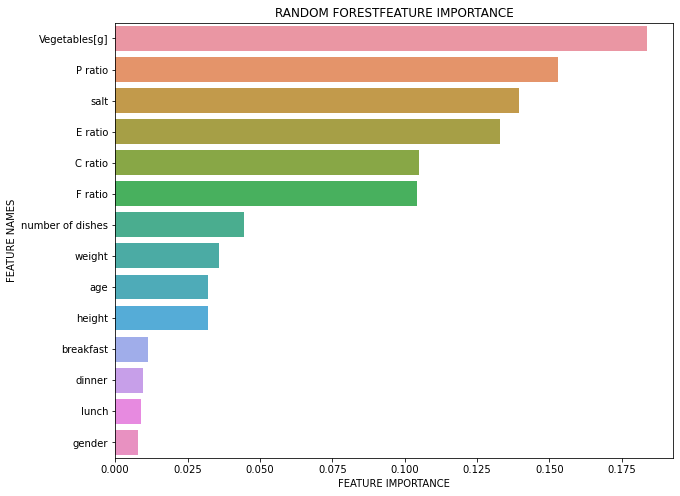

In [54]:
plot_feature_importance(Rfmodel.feature_importances_,X_train.columns,'RANDOM FOREST')

In [55]:
new_df= X.drop(columns=['gender','lunch','dinner','breakfast'])

In [67]:
new_train, new_test, target_train, target_test = train_test_split(new_df, y, test_size=0.2, random_state=42)

In [68]:
Rfmodel = RandomForestClassifier(random_state=49)
Rfmodel.fit(new_train,target_train)
y_pred=Rfmodel.predict(new_test)
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(target_test, y_pred)))

Model accuracy score with default hyperparameters: 0.8327


In [69]:
from sklearn import metrics
precision = metrics.precision_score(target_test,y_pred,average=None)
recall = metrics.recall_score(target_test,y_pred,average=None)

In [70]:
precision

array([0.98      , 0.85542169, 0.59574468, 0.        ])

In [71]:
recall

array([0.83050847, 0.92207792, 0.66666667, 0.        ])

In [72]:
label_names = ['1', '2', '3', '4']
print(classification_report(target_test, y_pred,target_names=label_names))


              precision    recall  f1-score   support

           1       0.98      0.83      0.90        59
           2       0.86      0.92      0.89       154
           3       0.60      0.67      0.63        42
           4       0.00      0.00      0.00         8

    accuracy                           0.83       263
   macro avg       0.61      0.60      0.60       263
weighted avg       0.82      0.83      0.82       263



In [73]:
kappa = cohen_kappa_score(target_test, y_pred)
print('Cohens kappa: %f' % kappa)

Cohens kappa: 0.700835


## Try to improve the prediction of class 4

In [81]:
from imblearn.over_sampling import SMOTE

In [82]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(new_train, target_train.ravel())

In [83]:
Rfmodel = RandomForestClassifier(random_state=49)
Rfmodel.fit(X_train_res,y_train_res)
y_pred=Rfmodel.predict(new_test)
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(target_test, y_pred)))

Model accuracy score with default hyperparameters: 0.8061


In [84]:
label_names = ['1', '2', '3', '4']
print(classification_report(target_test, y_pred,target_names=label_names))

              precision    recall  f1-score   support

           1       0.88      0.83      0.85        59
           2       0.85      0.88      0.87       154
           3       0.59      0.62      0.60        42
           4       0.40      0.25      0.31         8

    accuracy                           0.81       263
   macro avg       0.68      0.64      0.66       263
weighted avg       0.80      0.81      0.80       263



In [85]:
kappa = cohen_kappa_score(target_test, y_pred)
print('Cohens kappa: %f' % kappa)

Cohens kappa: 0.661672
